## Resources for getting modis data

FTP site with all available MODIS products: ftp://ladsweb.nascom.nasa.gov/allData/

Or if preferred:

HTTP site: https://ladsweb.nascom.nasa.gov/search/

Also useful: 

* http://reverb.echo.nasa.gov/reverb/#utf8=%E2%9C%93&spatial_map=satellite&spatial_type=rectangle
* https://modis.gsfc.nasa.gov/data/
* http://modis-fire.umd.edu/pages/ActiveFire.php

For checking data:

* https://worldview.earthdata.nasa.gov/

For example: https://worldview.earthdata.nasa.gov/?p=geographic&l=VIIRS_SNPP_CorrectedReflectance_TrueColor(hidden),MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor,MODIS_Fires_Terra,Reference_Labels(hidden),Reference_Features(hidden),Coastlines&t=2016-11-07&z=3&v=-214.85151694083405,-144.58066724130458,145.14848305916595,198.26308275869542

## Code for reading in MODIS data

[[[ 5207  5329  4705 ...,  2838  2743  2801]
  [ 5437  5198  4935 ...,  2688  2797  2739]
  [ 5433  5298  5277 ...,  2684  2598  2718]
  ..., 
  [ 4358  4443  4344 ...,  4518  4455  4317]
  [ 4390  4488  4434 ...,  4521  4441  4268]
  [ 4471  4552  4561 ...,  4567  4403  4190]]

 [[11754 12003 11172 ...,  9502  9130  9180]
  [12163 11781 11544 ...,  9182  9427  9223]
  [12187 12014 11958 ...,  9155  9103  9336]
  ..., 
  [11227 11492 11286 ..., 10809 10746 10445]
  [11433 11620 11487 ..., 10778 10671 10425]
  [11577 11731 11724 ..., 10900 10633 10281]]] {'reflectance_offsets': [-0.0, -0.0, -0.0, -0.0, -0.0], '_FillValue': 65535L, 'radiance_units': 'Watts/m^2/micrometer/steradian', 'corrected_counts_units': 'counts', 'valid_range': [0L, 32767L], 'long_name': 'Earth View 500M Aggregated 1km Reflective Solar Bands Scaled Integers', 'corrected_counts_offsets': [-0.0, -0.0, -0.0, -0.0, -0.0], 'corrected_counts_scales': [0.12497329711914062, 0.12497329711914062, 0.12497329711914062, 0.124973

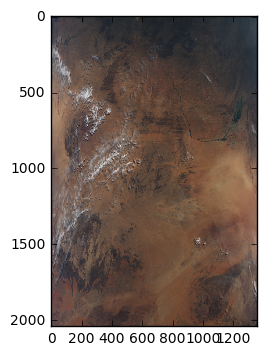

In [15]:
from pyhdf.SD import SD, SDC
import matplotlib.pyplot as plt
import numpy as np


def display_tcc_mcd(mcd_data):
    ''' Display a true color composite from MODIS data
    '''    
    m250 = mcd_data.select("EV_250_Aggr1km_RefSB").get()
    m500 = mcd_data.select("EV_500_Aggr1km_RefSB").get()
    m250_attributes = mcd_data.select("EV_250_Aggr1km_RefSB").attributes()
    m500_attributes = mcd_data.select("EV_500_Aggr1km_RefSB").attributes()
    
    print m250,m500_attributes
    
    
    # indexes into the required channels
    r_index = 0
    g_index = 1
    b_index = 0

    # switch the red and bluse channels, so the we get nice bright red plumes
    r = (m250[r_index, :, :] - m250_attributes['radiance_offsets'][r_index]) * \
         m250_attributes['radiance_scales'][r_index]
    g = (m500[g_index, :, :] - m500_attributes['radiance_offsets'][g_index]) * \
         m500_attributes['radiance_scales'][g_index]
    b = (m500[b_index, :, :] - m500_attributes['radiance_offsets'][b_index]) * \
         m500_attributes['radiance_scales'][b_index]
        
    # rescale for dispaly purposes
    r = np.round((r * (255 / np.max(r))) * 1).astype('uint8')
    g = np.round((g * (255 / np.max(g))) * 1).astype('uint8')
    b = np.round((b * (255 / np.max(b))) * 1).astype('uint8')

    rgb = np.dstack((r, g, b))

    plt.imshow(rgb)
    plt.show()

if __name__=="__main__":
    
    mcd_filename = 'C:\Users\Hannah.N\Documents\Earth Observation\Data_prelim\MYD021KM.A2016314.1315.006.2016315162211.hdf'
    mcd_data = SD(mcd_filename, SDC.READ)
        
    # Make and display a true color composite
    display_tcc_mcd(mcd_data)

## Resources for getting SEVIRI data

Probably the best place to get this from is the LSA SAF, which Martin can provide information on.  They have an FTP server which you can pull the data from.  Jinagping has access and I asked him to put a SEVIRI file with all image channels up for download, here is the link to them (only accessbile on the King's network):   http://137.73.25.32/severi/.  You do not need to use this though, and the data that you can get from the link below might be of more use.

Alternatively, if you are not able to get access to LSA SAF you can get the seviri data from here: https://eoportal.eumetsat.int/userMgmt/login.faces.  When on the site select the data centre box, and then in the new window search for this product: **High Rate SEVIRI Level 1.5 Image Data - MSG - 0 degree**.  This is the L1B data that you will require.  On the next tab, select Meteosat 10 for Africa and change scan type to full earth scan.  The next few tabs are more self explanatory.  When you get to the select format tab, choose HDF5 as your format. Then finish off the order.  Takes a while to process sometimes. 

Below is some code that can read in the data from the EUMETSAT site.  As I get my SEVIRI data from there typically.  The code only opens Channel 03 and Channel 10, but it gives you the idea of how to get the data.

In [6]:
## Code for reading in SEVIRI data
import h5py
import scipy.constants as constants


# seviri
def read_seviri(seviri_lon_path,
                seviri_lat_path,
                seviri_vza_path,
                seviri_data_path):

    # open up the data
    sev_product = h5py.File(seviri_data_path)
    sev_data = sev_product['U-MARF']['MSG']['Level1.5']['DATA']

    # read in geo and view angle data
    sev_lon = h5py.File(seviri_lon_path)['LON']
    sev_lat = h5py.File(seviri_lat_path)['LAT']
    sev_vza = h5py.File(seviri_vza_path)['VZA']

    # now make the data dict
    data_dict = {}

    data_dict['radiance_16'] = sev_data["Channel 03"]["IMAGE_DATA"][:]
    rad_12 = sev_data["Channel 10"]["IMAGE_DATA"][:]
    nadir_pixel_area = ((3.0**2)*1000.0**2)
    data_dict['pixel_size'] = nadir_pixel_area*(1/np.cos(np.radians(sev_vza)))

    data_dict['scan_angle'] = sev_vza
    data_dict['latitude'] = sev_lat
    data_dict['longitude'] = sev_lon

    data_dict['null_mask'] = (data_dict['radiance_16'] == 0)

    # convert DN to radiance / BT
    rad_factors = sev_product['U-MARF']['MSG']['Level1.5']["METADATA"]['HEADER']['RadiometricProcessing']['Level15ImageCalibration_ARRAY'][:]
    rad_16 = data_dict['radiance_16'] * rad_factors[2][0] + rad_factors[2][1]
    rad_16[rad_16 < 0] = 0

    data_dict['radiance_16'] = rad_16
    data_dict['frp'] = ((data_dict['pixel_size'] * constants.sigma / 7.897e-09)
                        * data_dict['radiance_16']) / 1000000  # in MW

    # method taken from https://github.com/pytroll/mipp/blob/master/mipp/xrit/MSG.py
    rad_12 = rad_12 * rad_factors[9][0] + rad_factors[9][1]
    C1 = 1.19104273e-16
    C2 = 0.0143877523
    v = 839
    rad_12 = ((C2 * 100 * v /
                np.log(C1 * 1.0e6 * v**3 /
                (1.0e-5 * rad_12) + 1)))

    coef_a = -0.00007009840
    coef_b = 1.031314600
    coef_c = -3.181090

    data_dict['btemp_12'] = rad_12 ** 2 * coef_a + rad_12 * coef_b + coef_c
    return data_dict


if __name__ == "__main__":
    
    seviri_path = '/Users/dnf/Projects_main/KCL/KCL-seviri-flares/data/seviri/'
    seviri_lon_path = seviri_path + 'geo/HDF5_LSASAF_MSG_LON_MSG-Disk_201408100000'
    seviri_lat_path = seviri_path +  'geo/HDF5_LSASAF_MSG_LAT_MSG-Disk_201408100000'
    seviri_vza_path = seviri_path +  'vza/HDF5_LSASAF_MSG_VZA_MSG-Disk_201502251945'
    seviri_data_path = seviri_path +  '/paper_data/l1b/MSG3-SEVI-MSG15-0100-NA-20150910181240.762000000Z-1167174.h5'
    
    sev_data = read_seviri(seviri_lon_path,
                           seviri_lat_path,
                           seviri_vza_path,
                           seviri_data_path)
    
    plt.imshow(sev_data['radiance_16'], cmap='gray')
    plt.show()
    

IOError: Unable to create file (Unable to open file: name = '/users/dnf/projects_main/kcl/kcl-seviri-flares/data/seviri//paper_data/l1b/msg3-sevi-msg15-0100-na-20150910181240.762000000z-1167174.h5', errno = 2, error message = 'no such file or directory', flags = 15, o_flags = 502)